# PRISMA Flow Diagram

In [1]:
# Import notebook setup.
from msc_code.scripts.notebook_setup import *

Notebook setup complete.


In [2]:
# Define path to output PRISMA diagram to.
figures_output_path = "/".join([OUTPUT_DIR, "reports", "data_extraction", "figures"])

In [3]:
# Import results from initial database search
database_search_path = "/".join([PROC_DATA_DIR, 'database_search'])
database_records_initial = pd.read_csv("/".join([database_search_path, 'database_search_results_initial.csv']))

# Count number of records retrieved from each database and create dataframe.
database_counts_initial = database_records_initial['Database'].value_counts().reset_index()
database_counts_initial.columns = ['Database', 'Count'] 

In [4]:
# Import dataframe contain duplicates that were removed before screening
database_duplicate_records = pd.read_csv("/".join([database_search_path, 'database_search_results_duplicates.csv']))

# Create dataframe of to count records removed before screening and the reasons for removal. 
records_removed = pd.DataFrame([{
    'Duplicates Removed': len(database_duplicate_records),
    'Records marked as ineligible\nby automation tools': 0,
    'Records removed for \n other reason': 0
}])

In [5]:
# Import title abstract screen start data
title_abstract_screen_df = pd.read_csv("/".join([PROC_DATA_DIR, "title_abstract_review", "title_abstract_review_FINAL.csv"]))

# Ensure each exclusion has a reason documented
missing_reason_df = title_abstract_screen_df[
    (title_abstract_screen_df['Exclude_FINAL'] == True) & 
    (title_abstract_screen_df['Reason_ID_FINAL'].isna())
]

# Show dataframe of missing exclusion reasons
missing_reason_df

,id,Publication Year,First Author,Authors,Publication Title,Summary,Database,DOI,URL,Title,...,Exclude_JGE,Reason_ID_JGE,Exclude_MS,Reason_ID_MS,Exclude_GC,Reason_ID_GC,Review_GC,Comments_GC,Exclude_FINAL,Reason_ID_FINAL


In [6]:
# Ensure each reason ID is marked with exclude
reason_without_exclusion_df = title_abstract_screen_df[
    (title_abstract_screen_df['Reason_ID_FINAL'].notna()) & 
    (title_abstract_screen_df['Exclude_FINAL'] != True)
]
reason_without_exclusion_df

,id,Publication Year,First Author,Authors,Publication Title,Summary,Database,DOI,URL,Title,...,Exclude_JGE,Reason_ID_JGE,Exclude_MS,Reason_ID_MS,Exclude_GC,Reason_ID_GC,Review_GC,Comments_GC,Exclude_FINAL,Reason_ID_FINAL


In [7]:

# Filter out results from google scholar.
database_title_abstract_screen_df = title_abstract_screen_df[title_abstract_screen_df['Database'] != 'Google Scholar']

# Count the number of records that were screened that were gathered from databases
records_screened_count = len(database_title_abstract_screen_df)

In [8]:
# Count the number of records that were exluded during title and abstract screening.
records_excluded_count = len(database_title_abstract_screen_df[database_title_abstract_screen_df['Exclude_FINAL'] == True])
# Count the number of records that were included during title and abstract screening.
records_retrieval_sought_count = len(database_title_abstract_screen_df[database_title_abstract_screen_df['Exclude_FINAL'] == False])

In [9]:
# Import data from full text screening to see which records were assessed for eligibility

# Starting data
full_text_review_start_df = pd.read_csv("/".join([PROC_DATA_DIR, "full_text_screen", "full_text_screen_start.csv"]))

# Remove white space and titleize
full_text_review_start_df['Database'] = full_text_review_start_df['Database'].str.strip().str.title()

# Rename 'id' column to 'Study_ID' in FT review starting data
full_text_review_start_df = full_text_review_start_df.rename(columns={
    'id': 'Study_ID'
})

In [10]:
# End of review data
full_text_review_end_df = pd.read_csv("/".join([PROC_DATA_DIR, "full_text_screen", "full_text_screen_end_final.csv"]))

full_text_review_end_df.columns

Index(['Study_ID', 'Exclude_JGE', 'Reason_ID_JGE', 'Unclear_JGE',
       'Comments_JGE', 'Exclude_MS', 'Reason_ID_MS', 'Unclear_MS',
       'Comments_MS', 'Exclude_GC', 'Reason_ID_GC', 'Comments_GC',
       'Exclude_FINAL', 'Reason_ID_FINAL'],
      dtype='object')

In [11]:
# Ensure each exclusion has a reason documented
missing_reason_df = full_text_review_end_df[
    (full_text_review_end_df['Exclude_FINAL'] == True) & 
    (full_text_review_end_df['Reason_ID_FINAL'].isna())
]

# Show dataframe of missing exclusion reasons
missing_reason_df

,Study_ID,Exclude_JGE,Reason_ID_JGE,Unclear_JGE,Comments_JGE,Exclude_MS,Reason_ID_MS,Unclear_MS,Comments_MS,Exclude_GC,Reason_ID_GC,Comments_GC,Exclude_FINAL,Reason_ID_FINAL


In [12]:
# Ensure each reason ID is marked with exclude
reason_without_exclusion_df = full_text_review_end_df[
    (full_text_review_end_df['Reason_ID_FINAL'].notna()) & 
    (full_text_review_end_df['Exclude_FINAL'] != True)
]
reason_without_exclusion_df

,Study_ID,Exclude_JGE,Reason_ID_JGE,Unclear_JGE,Comments_JGE,Exclude_MS,Reason_ID_MS,Unclear_MS,Comments_MS,Exclude_GC,Reason_ID_GC,Comments_GC,Exclude_FINAL,Reason_ID_FINAL


In [13]:
# Take database information from start dataframe
database_map = full_text_review_start_df[['Study_ID', 'Database']]

# Merge database map with full_text_review_end 
full_text_review_end_df = pd.merge(
    full_text_review_end_df,
    database_map,
    how='left',
    on='Study_ID'
)

# Create dataframe of full text review records from databases at start of screening, filtering out google scholar
database_full_text_review_start_df = full_text_review_start_df[full_text_review_start_df['Database'] != 'Google Scholar']


# Create dataframe of full text review records from databases at end of screening, filtering out google scholar
database_full_text_review_end_df = full_text_review_end_df[full_text_review_end_df['Database'] != 'Google Scholar']
len(database_full_text_review_end_df)

263

In [14]:
database_full_text_review_end_df[database_full_text_review_end_df['Exclude_FINAL'].isna()]

,Study_ID,Exclude_JGE,Reason_ID_JGE,Unclear_JGE,Comments_JGE,Exclude_MS,Reason_ID_MS,Unclear_MS,Comments_MS,Exclude_GC,Reason_ID_GC,Comments_GC,Exclude_FINAL,Reason_ID_FINAL,Database


In [15]:
# Figure out where extra paper came from

# Get list of Study_IDs in full_text_review_start_df 
database_full_text_review_start_ids = database_full_text_review_start_df['Study_ID']

# Get list of Study_IDs in full_text_review_end_df
database_full_text_review_end_ids = database_full_text_review_end_df['Study_ID']

# Create list of items that are present at end of full text review that weren't present at start
database_full_text_review_extra_end_ids = list(set(database_full_text_review_end_ids) - 
                                  set(database_full_text_review_start_ids))

# Show list of IDs that are present at the end of full text review that were not there at the start
database_full_text_review_extra_end_ids

[]

In [16]:
# Create list of iterms that are present at the start of full text review, but not the end
database_full_text_review_extra_start_ids = list(set(database_full_text_review_start_ids) -
                                        set(database_full_text_review_end_ids))
# Display the list
database_full_text_review_extra_start_ids

[]

In [17]:
# Count the number of records that underwent full text review (assessed for eligibility)
records_assessed_for_eligibility_count = len(database_full_text_review_end_df)

In [18]:
# Create dataframe of full text review exclusion reasoning
database_full_text_review_exclusion_reasoning = database_full_text_review_end_df['Reason_ID_FINAL'].value_counts().reset_index()

# Rename columns
database_full_text_review_exclusion_reasoning.columns = ['Reason ID', 'Count']

# Set Reason ID to integer value
database_full_text_review_exclusion_reasoning['Reason ID'] = database_full_text_review_exclusion_reasoning['Reason ID'].astype(int)

# Sort by Reason ID ascending
database_full_text_review_exclusion_reasoning = database_full_text_review_exclusion_reasoning.sort_values(by='Reason ID', ascending=True)

## Other Sources

In [19]:
# Create dataframe of items from Google Scholar
google_full_text_review_start_df = full_text_review_start_df[full_text_review_start_df['Database'] == 'Google Scholar']

# Create dataframe of full text review records from databases at end of screening, filtering out google scholar
google_full_text_review_end_df = full_text_review_end_df[full_text_review_end_df['Database'] == 'Google Scholar']

# Determine number of records present at the start of google scholar full text review
len(google_full_text_review_start_df)

53

In [20]:
# Determine number of records present at the end of google scholar full text review
len(google_full_text_review_end_df)

53

In [21]:
# Create list of IDs that are present at the end of google scholar full text review, but not start.
google_full_text_review_extra_end_ids = list(set(google_full_text_review_end_df['Study_ID']) - 
                                            set(google_full_text_review_start_df['Study_ID']))
google_full_text_review_extra_end_ids

[]

In [22]:
# Create a list of IDs that are present at the start of google scholar full text review, but not the end.
google_full_text_review_extra_start_ids = list(set(google_full_text_review_start_df['Study_ID']) -
                                               set(google_full_text_review_end_df['Study_ID']))
google_full_text_review_extra_start_ids

[]

In [23]:
# Determine number of unique results found from Google Scholar
google_scoholar_results_count = len(google_full_text_review_end_df)

# Create dataframe of numbers of records found from other sources. 
alternative_sources_df = pd.DataFrame(columns=['Source', 'Count'])

# Add Google Scholar Results 
alternative_sources_df.loc[len(alternative_sources_df)] = ['Google Scholar', google_scoholar_results_count]

# Add Bibliography Search
alternative_sources_df.loc[len(alternative_sources_df)] = ['Bibliography Search', 0]

# Show dataframe
alternative_sources_df

,Source,Count
0,Google Scholar,53
1,Bibliography Search,0


In [24]:
# Calculate sum of alternative sources records that were sought for retrieval.
alternative_sources_retrieval_sought_count = alternative_sources_df['Count'].sum()

In [25]:
# Calculate number of exclusions for google scholar
google_exclusion_reasoning_df = google_full_text_review_end_df['Reason_ID_FINAL'].value_counts().reset_index()

# Rename columns
google_exclusion_reasoning_df.columns = ['Reason ID', 'Count']

# Cast Reason ID to integer value
google_exclusion_reasoning_df['Reason ID'] = google_exclusion_reasoning_df['Reason ID'].astype(int)

# Sort by Reason ID ascending
google_exclusion_reasoning_df = google_exclusion_reasoning_df.sort_values(by='Reason ID', ascending=True)

# Show dataframe
google_exclusion_reasoning_df

,Reason ID,Count
2,1,9
3,2,7
5,3,2
1,5,11
4,6,4
0,9,14
6,10,1


In [26]:
# Calculate final database inclusion count
database_inclusion_count = len(database_full_text_review_end_df[database_full_text_review_end_df['Exclude_FINAL'] == False])
google_inclusion_count = len(google_full_text_review_end_df[google_full_text_review_end_df['Exclude_FINAL'] == False])

In [27]:
# TODO Import Bibliography Search Data

# TODO Merge with Google data

# TODO Output to Diagram

alternative_sources_exclusion_reasoning_df = google_exclusion_reasoning_df.copy()

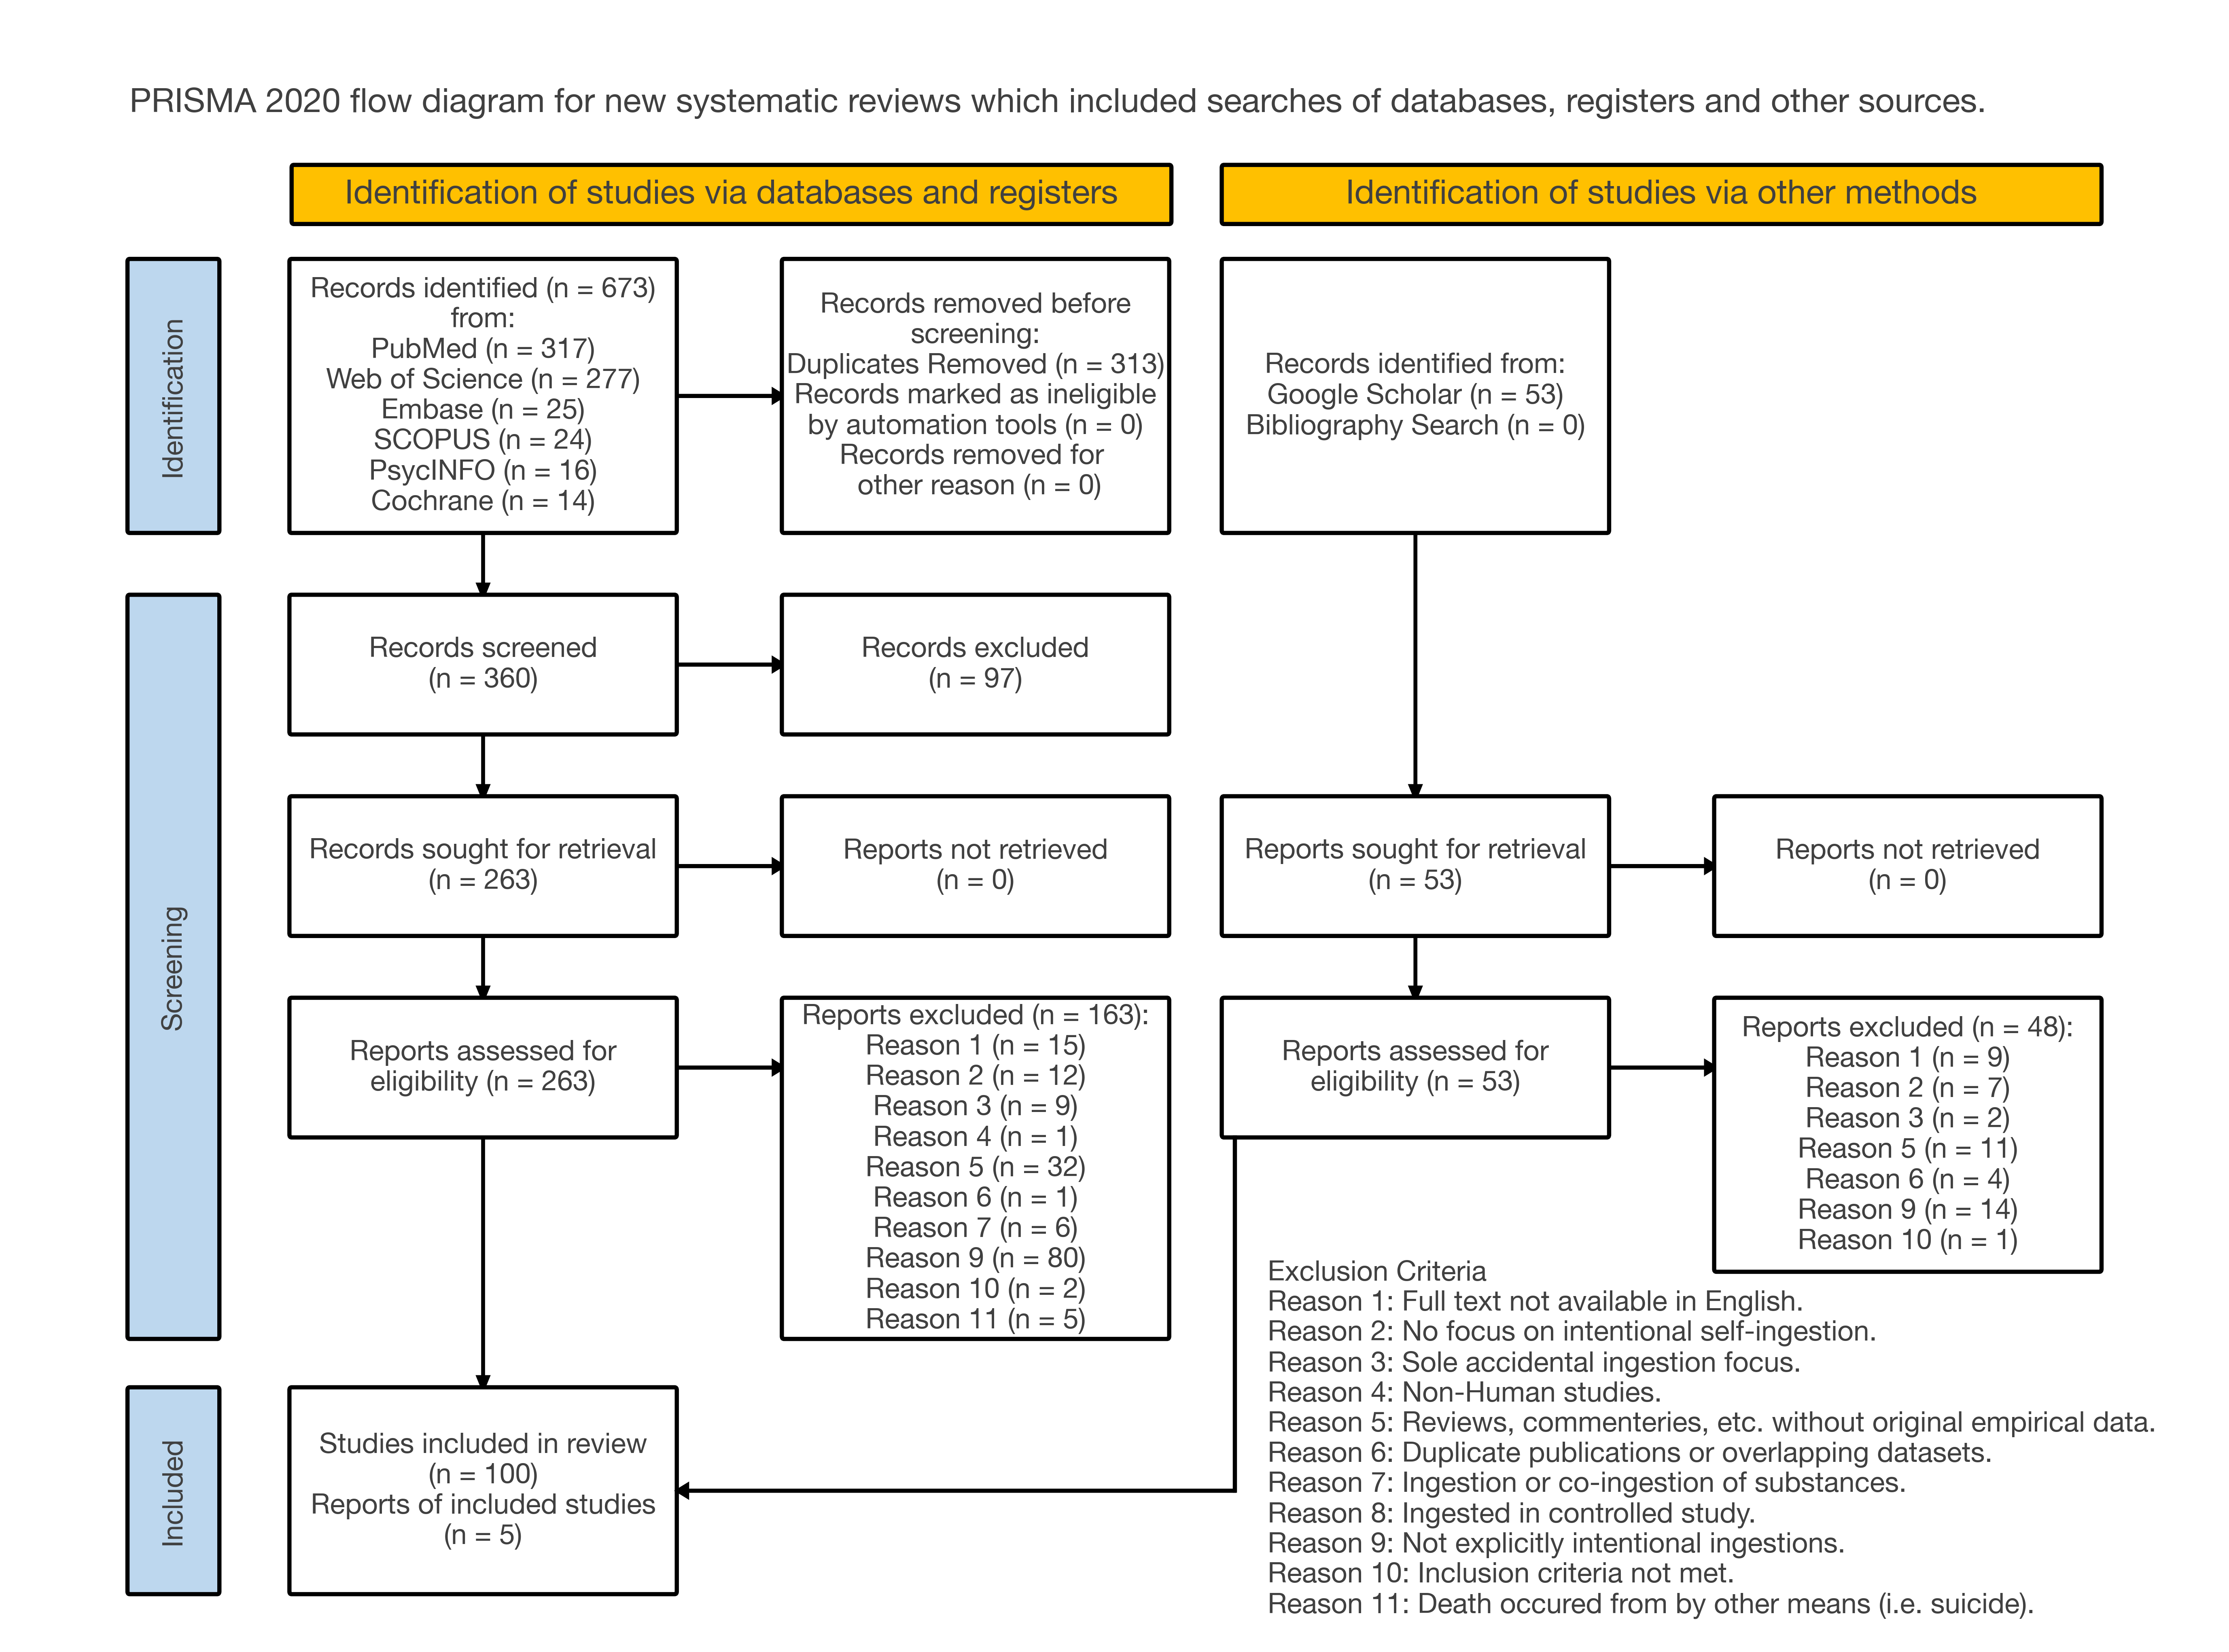

In [28]:
from matplotlib.patches import FancyBboxPatch, Rectangle, FancyArrow
from matplotlib.lines import Line2D

# A4 landscape size
fig, ax = plt.subplots(figsize=(11.69, 8.27))
ax.axis('off')

# Set axis limits
ax.set_xlim(0, 20)
ax.set_ylim(0, 12)

# Helper function to draw a vertical arrow
def draw_vertical_arrow(ax, x, y_start, y_end):
    length = y_end - y_start
    arrow = FancyArrow(x, y_start, 0, length,
                       width=0.01, head_width=0.1, head_length=0.1, length_includes_head=True,
                       color='black')
    ax.add_patch(arrow)

# Helper function to draw a horizontal arrow
def draw_horizontal_arrow(ax, x_start, x_end, y):
    length = x_end - x_start
    arrow = FancyArrow(x_start, y, length, 0,
                       width=0.01, head_width=0.1, head_length=0.1, length_includes_head=True,
                       color='black')
    ax.add_patch(arrow)

# Draw title in top-left corner (using ax.text instead of suptitle)
ax.text(1, 11.5, 
        "PRISMA 2020 flow diagram for new systematic reviews which included searches of databases, registers and other sources.",
        fontsize=12, fontweight='bold', ha='left', va='top')

# Function to draw yellow header box
def draw_yellow_box(ax, x, y, width, height, text, fontsize=12):
    box = FancyBboxPatch(
        (x, y), width, height,
        boxstyle="round,pad=0.02",
        edgecolor="black",
        facecolor="#FFC000",
        linewidth=1.5
    )
    ax.add_patch(box)
    ax.text(
        x + width / 2, y + height / 2, text,
        ha='center', va='center',
        fontsize=fontsize, fontweight='bold'
    )

# Draw first yellow header box below the title
draw_yellow_box(ax, x=2.5, y=10.5, width=8, height=0.4, 
                text="Identification of studies via databases and registers")

# Draw second yellow box beside it
draw_yellow_box(ax, x=11, y=10.5, width=8, height=0.4,
                text="Identification of studies via other methods")

def draw_vertical_blue_box(ax, x, y, width, height, text, fontsize=10):
    box = FancyBboxPatch(
        (x, y), width, height,
        boxstyle="round,pad=0.02",
        edgecolor="black",
        facecolor="#BDD7EE",  # Light blue (similar to PRISMA)
        linewidth=1.5
    )
    ax.add_patch(box)
    
    # Rotated text (90 degrees, bottom to top)
    ax.text(
        x + width/2, y + height/2, text,
        ha='center', va='center',
        rotation=90,  # rotate 90 degrees counterclockwise
        fontsize=fontsize, fontweight='bold'
    )

draw_vertical_blue_box(ax, x=1, y=8.2, width=0.8, height=2, text="Identification")
draw_vertical_blue_box(ax, x=1, y=2.2, width=0.8, height=5.5, text="Screening")
draw_vertical_blue_box(ax, x=1, y=0.3, width=0.8, height=1.5, text="Included")

def draw_white_box(ax, x, y, width, height, text, fontsize=10):
    box = FancyBboxPatch(
        (x, y), width, height,
        boxstyle="round,pad=0.02",
        edgecolor="black",
        facecolor="white",
        linewidth=1.5
    )
    ax.add_patch(box)
    
    ax.text(
        x + width/2, y + height/2, text,
        ha='center', va='center',
        fontsize=fontsize
    )

# Column 1
draw_white_box(ax, x=2.48, y=8.2, width=3.5, height=2, 
            text="Records identified (n = {})\nfrom:\n{}".format(
                database_counts_initial['Count'].sum(),
                "\n".join(
                    f"{db} (n = {count})" 
                    for db, count in zip(
                        database_counts_initial['Database'],
                        database_counts_initial['Count']
                    )
                )
            )
)
draw_vertical_arrow(ax, x=4.23, y_start=8.18, y_end=6.7 + 1)
draw_horizontal_arrow(ax, x_start=6, x_end=6.98, y=9.2)  # to records removed before screening
draw_white_box(ax, x=2.48, y=6.7, width=3.5, height=1, 
            text=f"Records screened\n(n = {records_screened_count})")
draw_vertical_arrow(ax, x=4.23, y_start=6.68, y_end=5.2 + 1)
draw_horizontal_arrow(ax, x_start=6, x_end=6.98, y=7.2)  # records excluded
draw_white_box(ax, x=2.48, y=5.2, width=3.5, height=1, 
            text=f"Records sought for retrieval\n(n = {records_retrieval_sought_count})")
draw_horizontal_arrow(ax, x_start=6, x_end=6.98, y=5.7)  # records not retrieved
draw_vertical_arrow(ax, x=4.23, y_start=5.18, y_end=3.7 + 1)
draw_white_box(ax, x=2.48, y=3.7, width=3.5, height=1, 
            text=f"Reports assessed for\neligibility (n = {records_assessed_for_eligibility_count})")
draw_vertical_arrow(ax, x=4.23, y_start=3.68, y_end=0.3 + 1.5)
draw_horizontal_arrow(ax, x_start=6, x_end=6.98, y=4.2)  # reports assessed for eligibility
draw_white_box(ax, x=2.48, y=0.3, width=3.5, height=1.5, 
            text=f"Studies included in review\n(n = {database_inclusion_count})\n"
            f"Reports of included studies\n(n = {google_inclusion_count})")

# Column 2
draw_white_box(
    ax, x=6.98, y=8.2, width=3.5, height=2,
    text="Records removed before\nscreening:\n" + "\n".join(
        f"{col} (n = {records_removed[col].iloc[0]})"
        for col in records_removed.columns
    )
)
draw_white_box(ax, x=6.98, y=6.7, width=3.5, height=1, 
            text=f"Records excluded\n(n = {records_excluded_count})")
draw_white_box(ax, x=6.98, y=5.2, width=3.5, height=1, 
            text=f"Reports not retrieved\n(n = 0)")
draw_white_box(ax, x=6.98, y=2.2, width=3.5, height=2.5, 
            text="Reports excluded (n = {}):\n{}".format(
                database_full_text_review_exclusion_reasoning['Count'].sum(),
                "\n".join(
                    f"Reason {reason_id} (n = {count})"
                    for reason_id, count in zip(
                        database_full_text_review_exclusion_reasoning['Reason ID'],
                        database_full_text_review_exclusion_reasoning['Count']
                    )
                )
            )
)

# Column 3
draw_white_box(ax, x=11, y=8.2, width=3.5, height=2, 
            text="Records identified from:\n{}".format(
                "\n".join(
                    f"{source} (n = {count})"
                    for source, count in zip(
                        alternative_sources_df['Source'],
                        alternative_sources_df['Count']
                    )
                )
            ))
draw_vertical_arrow(ax, x=12.75, y_start=8.18, y_end=5.2 + 1)
draw_horizontal_arrow(ax, x_start=14.5, x_end=15.5, y=5.7)  # to reports not retrieved
draw_white_box(ax, x=11, y=5.2, width=3.5, height=1, 
            text=f"Reports sought for retrieval\n(n = {alternative_sources_retrieval_sought_count})")
draw_vertical_arrow(ax, x=12.75, y_start=5.18, y_end=3.7 + 1)
draw_horizontal_arrow(ax, x_start=14.5, x_end=15.5, y=4.2)  # to reports excluded
draw_white_box(ax, x=11, y=3.7, width=3.5, height=1, 
            text=f"Reports assessed for\neligibility (n = {alternative_sources_retrieval_sought_count})")

# Column 4
draw_white_box(ax, x=15.5, y=5.2, width=3.5, height=1, 
            text="Reports not retrieved\n(n = 0)")
draw_white_box(ax, x=15.5, y=2.7, width=3.5, height=2, 
            text="Reports excluded (n = {}):\n{}".format(
                alternative_sources_exclusion_reasoning_df['Count'].sum(),
                "\n".join(
                    f"Reason {reason_id} (n = {count})"
                    for reason_id, count in zip(
                        alternative_sources_exclusion_reasoning_df['Reason ID'],
                        alternative_sources_exclusion_reasoning_df['Count']
                    )
                )
            )
)

# Exclusion
exclusion_text = "Exclusion Criteria\n" + "\n".join(
    f"Reason {id}: {value}"
    for id, value in exclusion_criteria_short.items()
)

# Add text to the canvas
ax.text(11.4, 0.1, exclusion_text,
        fontsize=10, va='bottom', ha='left')

# Draw final right angle arrow

# Coordinates
exit_x = 11.1  # center of top box
exit_y = 3.68    # bottom of top box

corner_y = 1.05  # vertical center of lower box (entry y)
entry_x = 6   # right side of lower box

# Step 1: Downward vertical line
ax.add_line(Line2D([exit_x, exit_x], [exit_y, corner_y], linewidth=1.5, color='black'))

# Step 2: Horizontal arrow into right side of box
arrow = FancyArrow(exit_x, corner_y, entry_x - exit_x, 0,
                   width=0.01, head_width=0.1, head_length=0.1, 
                   length_includes_head=True, color='black')
ax.add_patch(arrow)

plt.tight_layout()
output_path = "/".join([figures_output_path, "prisma_diagram.png"])
plt.savefig(output_path)
plt.show()